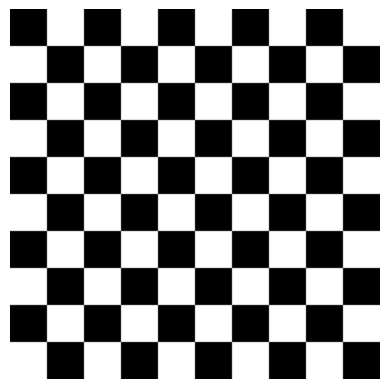

In [1]:
from pattern import Checker
import numpy as np

# Example:
checker = Checker(200, 20)
board = checker.draw()

checker.show()

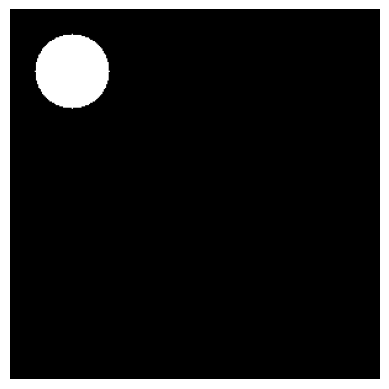

In [1]:
from pattern import Circle
import numpy as np

# Example:
checker = Circle(300, 30, (50,50))
checker.draw()

checker.show()

100
100


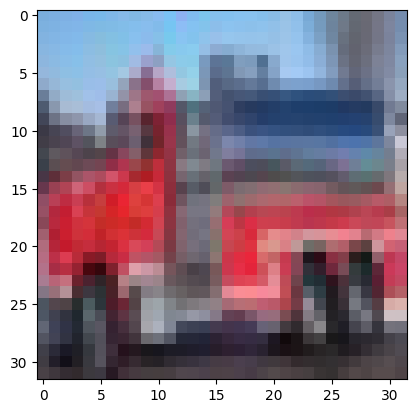

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import json
# image = np.load("data/exercise_data/1.npy")
# plt.imshow(image)
labels_dict = {
    0: 'airplane',
    1: 'automobile', 
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


images = []
labels = []

batch_size = 10 
import os 
with open("data/Labels.json") as json_file:
    data = json.load(json_file)

    for k, v in data.items():
        image = np.load("data/exercise_data/" + k + ".npy")
        label = labels_dict[v]
        plt.imshow(np.load(os.path.join("data/exercise_data", k) + ".npy")
        )
        images.append(image)
        labels.append(label)

print(len(images))
print(len(labels))
output = (images,labels)

In [2]:
! pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 12.8 MB/s  0:00:023.3 MB/s eta 0:00:01:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
from generator import ImageGenerator
import matplotlib.pyplot as plt

# Initialize generator
gen = ImageGenerator(
    "data/exercise_data",
    "data/Labels.json",
    batch_size=64,
    image_size=(16, 16, 3),
    shuffle=True
)

# Get a batch of images and labels
images, labels = gen.next()
images, labels = gen.next()


Reusing images to fill the batch, current batch size: 36
Batch size after reusing: 64


In [15]:
! pip install scikit-image

  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 3.1 MB/s  0:00:04a 0:00:010:00:01:01
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-image]0m 4/5 [scikit-image]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [40]:
print(images[0][0][1])
print(images[0][0][2])
print(images[0][0][3])

[206 200 182]
[206 200 175]
[206 200 174]


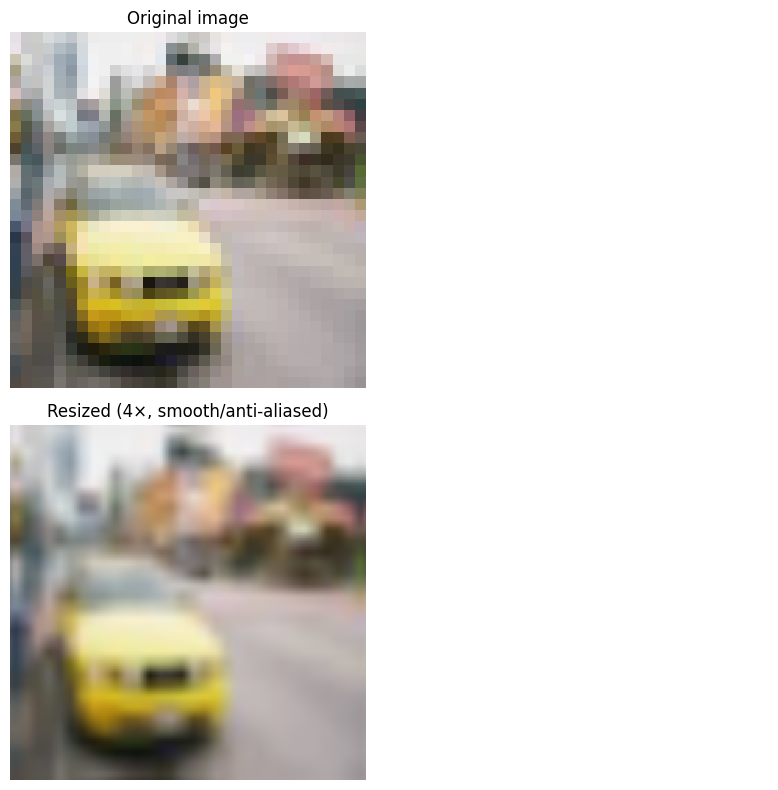

In [57]:
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean

# Take one image from your batch
image = images[0]

# Normalize if pixel values are 0–255
if image.max() > 1.0:
    image = image / 255.0

# Resize: enlarge 4× (with anti-aliasing to smooth)
image_resized = resize(
    image, 
    [128, 128, image.shape[2]], 
    anti_aliasing=True
)
# --- Plot the results ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original image")


ax[2].imshow(image_resized)
ax[2].set_title("Resized (4×, smooth/anti-aliased)")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()


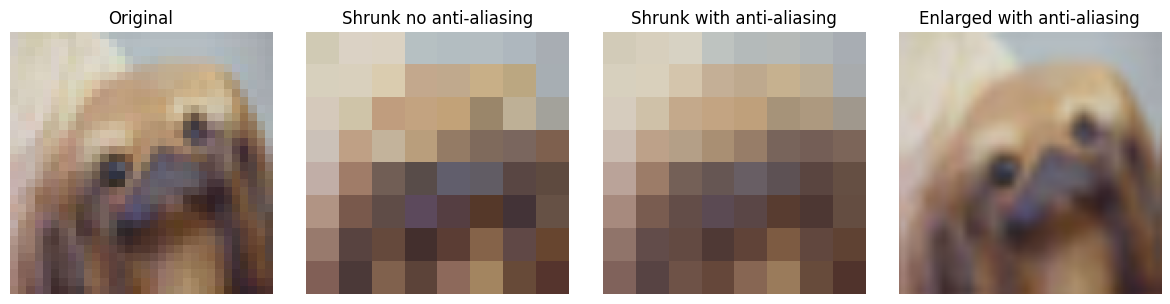

In [49]:
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize
import numpy as np

# Assume `images` is your batch of images
image = images[0]  # pick the first image

# --- Shrink without anti-aliasing (to exaggerate aliasing) ---
shrink_noaa = rescale(image, 0.25, channel_axis=-1, anti_aliasing=False)

# --- Shrink with anti-aliasing ---
shrink_aa = rescale(image, 0.25, channel_axis=-1, anti_aliasing=True)

# --- Enlarge with anti-aliasing ---
enlarge_aa = resize(image, (image.shape[0]*4, image.shape[1]*4), anti_aliasing=True)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].imshow(image.astype(np.uint8))
axes[0].set_title("Original")

axes[1].imshow(shrink_noaa)
axes[1].set_title("Shrunk no anti-aliasing")

axes[2].imshow(shrink_aa)
axes[2].set_title("Shrunk with anti-aliasing")

axes[3].imshow(enlarge_aa)
axes[3].set_title("Enlarged with anti-aliasing")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()




In [3]:
import random

a = [6, 4, 8, 9, 10]
b = [1, 2, 3, 4, 5]

temp = list(zip(a, b))  # Pair the elements
random.shuffle(temp)  # Shuffle the pairs
res1, res2 = zip(*temp)  # Unzip into separate lists

a, b = list(res1), list(res2)  

print(a)  
print(b)

[4, 9, 10, 8, 6]
[2, 4, 5, 3, 1]


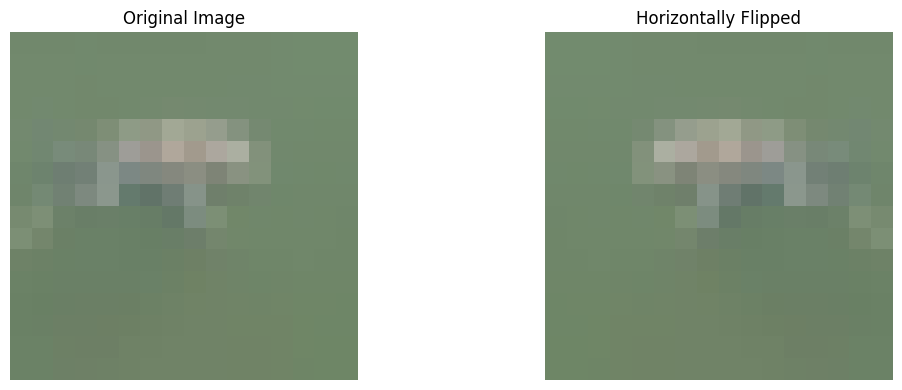

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Pick the image
image = images[1]

# Create mirrored versions
# h_flip = np.fliplr(image)   # horizontal flip
h_flip = image[:, ::-1 ,: ]   # horizontal flip
# Plot all images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(h_flip)
axes[1].set_title("Horizontally Flipped")
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [20]:

for i in range(150):
    print(random.choice([True, False]))

True
False
True
False
True
False
False
True
False
False
False
False
True
False
True
True
True
False
False
True
False
True
True
True
False
True
False
True
True
False
True
False
False
True
False
True
False
False
False
False
False
True
False
True
False
True
False
False
False
True
True
True
False
True
False
False
True
False
True
False
True
False
True
False
True
True
False
False
True
False
True
False
True
True
False
False
True
True
False
False
False
False
False
False
True
True
True
True
False
False
True
False
False
True
True
False
True
False
False
True
False
False
False
False
True
False
True
True
False
False
True
True
False
True
True
False
True
False
False
True
False
False
True
False
True
True
False
False
True
False
False
False
True
True
False
True
False
False
True
False
True
True
False
False
False
True
False
False
False
True


Text(0.5, 1.0, '360 Rotated')

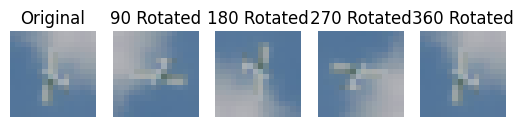

In [38]:
fig, ax = plt.subplots(1, 5)

ax[0].imshow(images[0])
ax[0].axis('off')
ax[0].set_title(f"Original")


ax[1].imshow(np.rot90(images[0]))
ax[1].axis('off')
ax[1].set_title(f"90 Rotated")

ax[2].imshow(np.rot90(np.rot90(images[0])))
ax[2].axis('off')
ax[2].set_title(f"180 Rotated")

ax[3].imshow(np.rot90(np.rot90(np.rot90(images[0]))))
ax[3].axis('off')
ax[3].set_title(f"270 Rotated")

ax[4].imshow(np.rot90(images[0], k=4))
ax[4].axis('off')
ax[4].set_title(f"360 Rotated")

In [37]:
print( [random.choice([90, 180, 270]) for i in range(10)])

[270, 90, 180, 270, 270, 270, 270, 270, 90, 90]


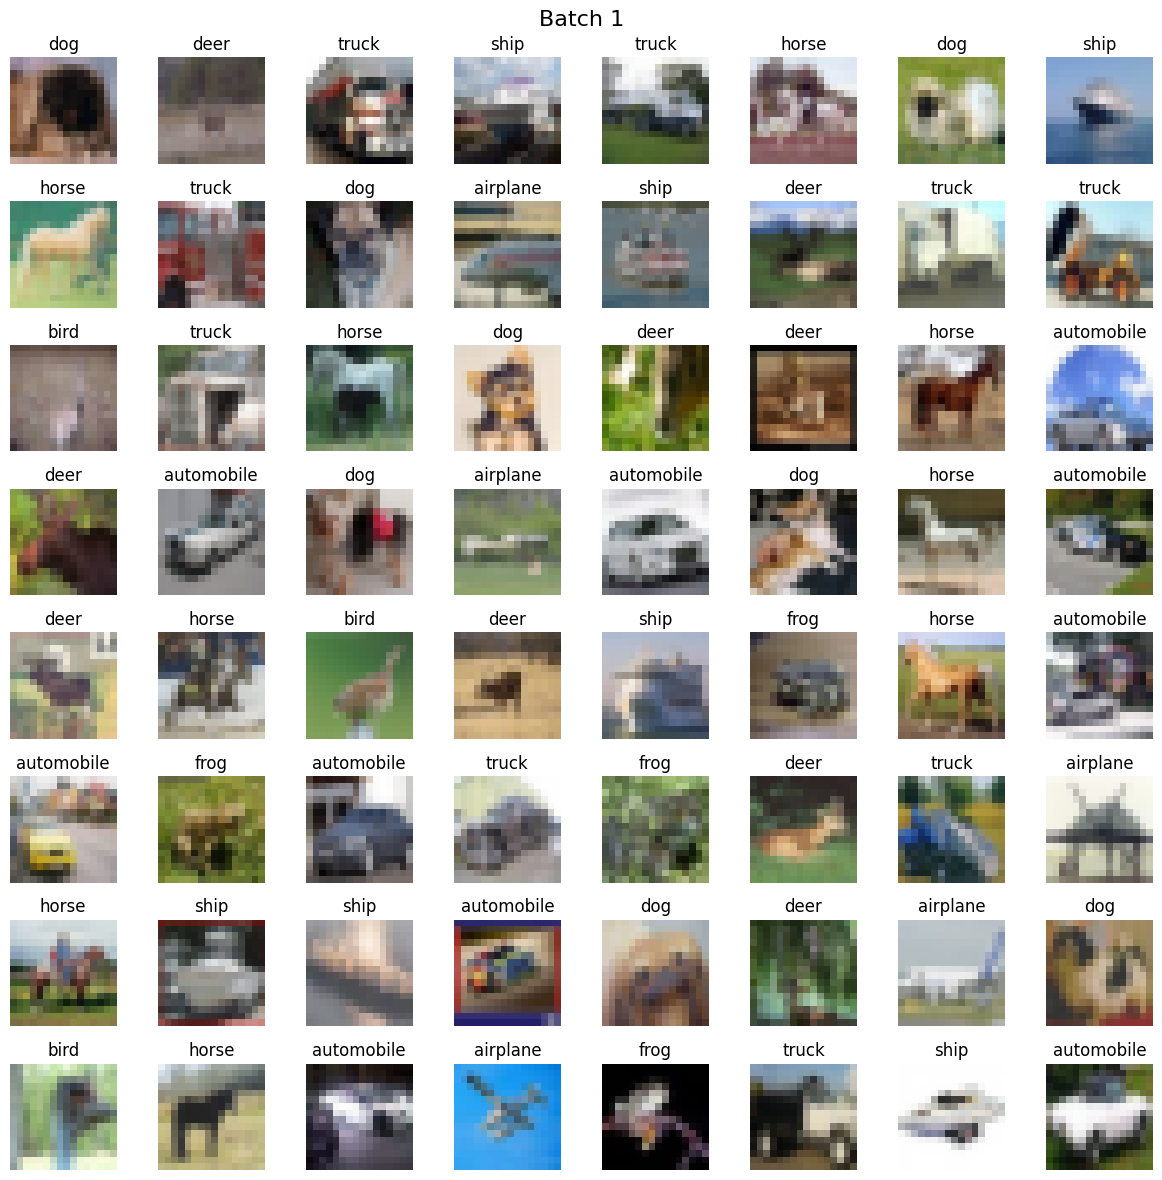

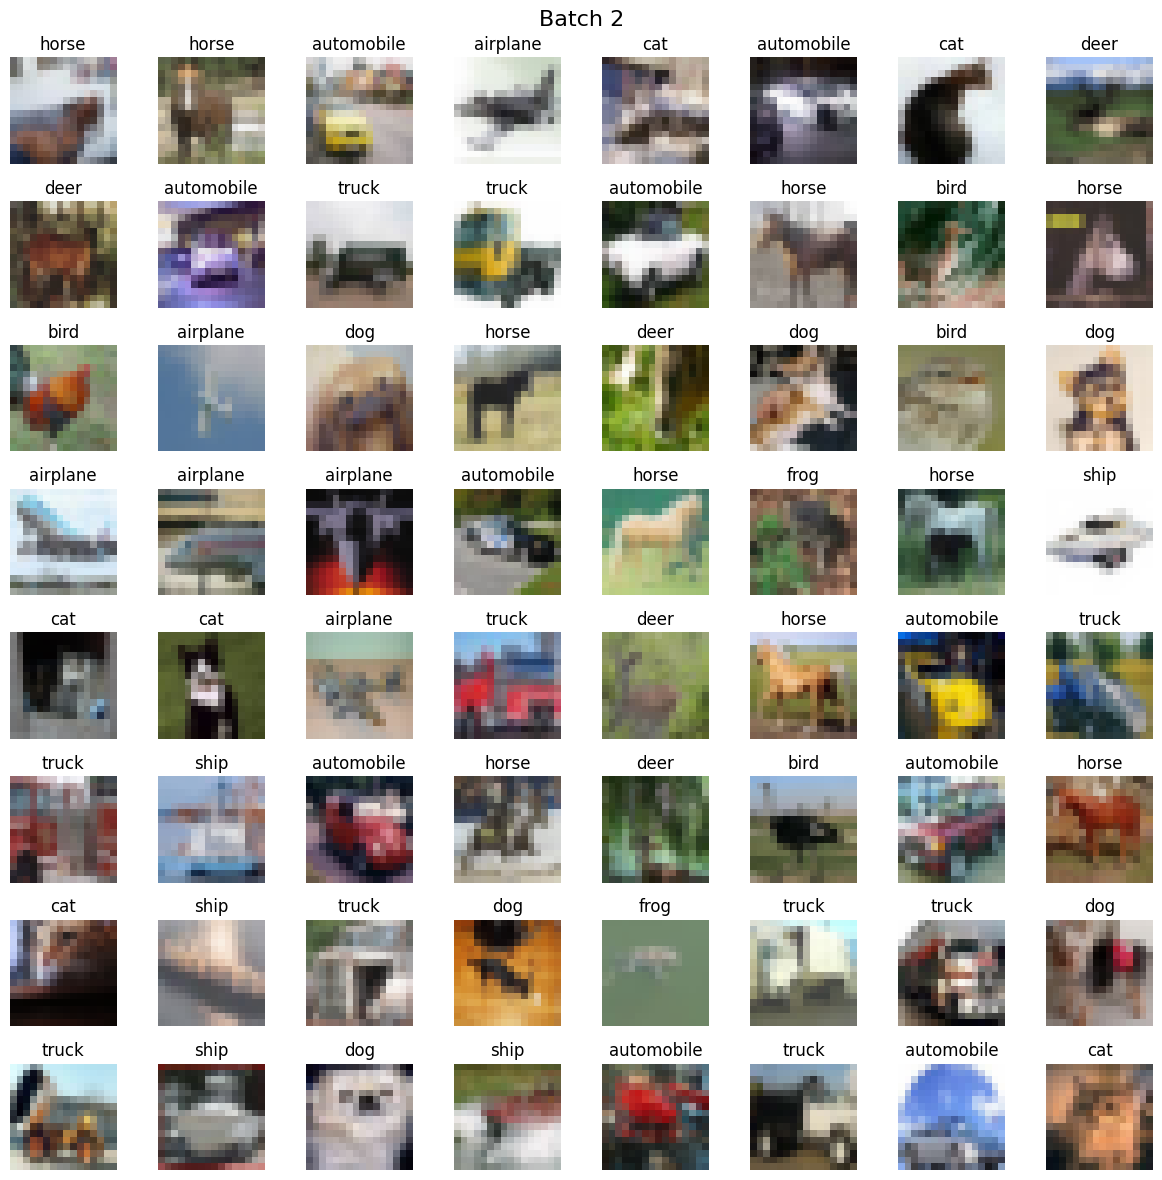

In [2]:
from generator import ImageGenerator
import matplotlib.pyplot as plt
# put the each batch into subplot 

gen = ImageGenerator(
    "data/exercise_data",
    "data/Labels.json",
    batch_size=64,
    image_size=(16, 16, 3),
    shuffle=True
)

for batch_num in range(3):  # Display first 3 batches
    try: 
        images, labels = gen.next()
    except StopIteration:
        break

    fig, ax = plt.subplots(8, 8, figsize=(12, 12))
    ax = ax.ravel()
    
    for i in range(64):
        ax[i].imshow(images[i])
        ax[i].axis('off')
        ax[i].set_title(f"{labels[i]}")
    
    plt.suptitle(f"Batch {batch_num + 1}", fontsize=16)
    plt.tight_layout()
    plt.show()
 


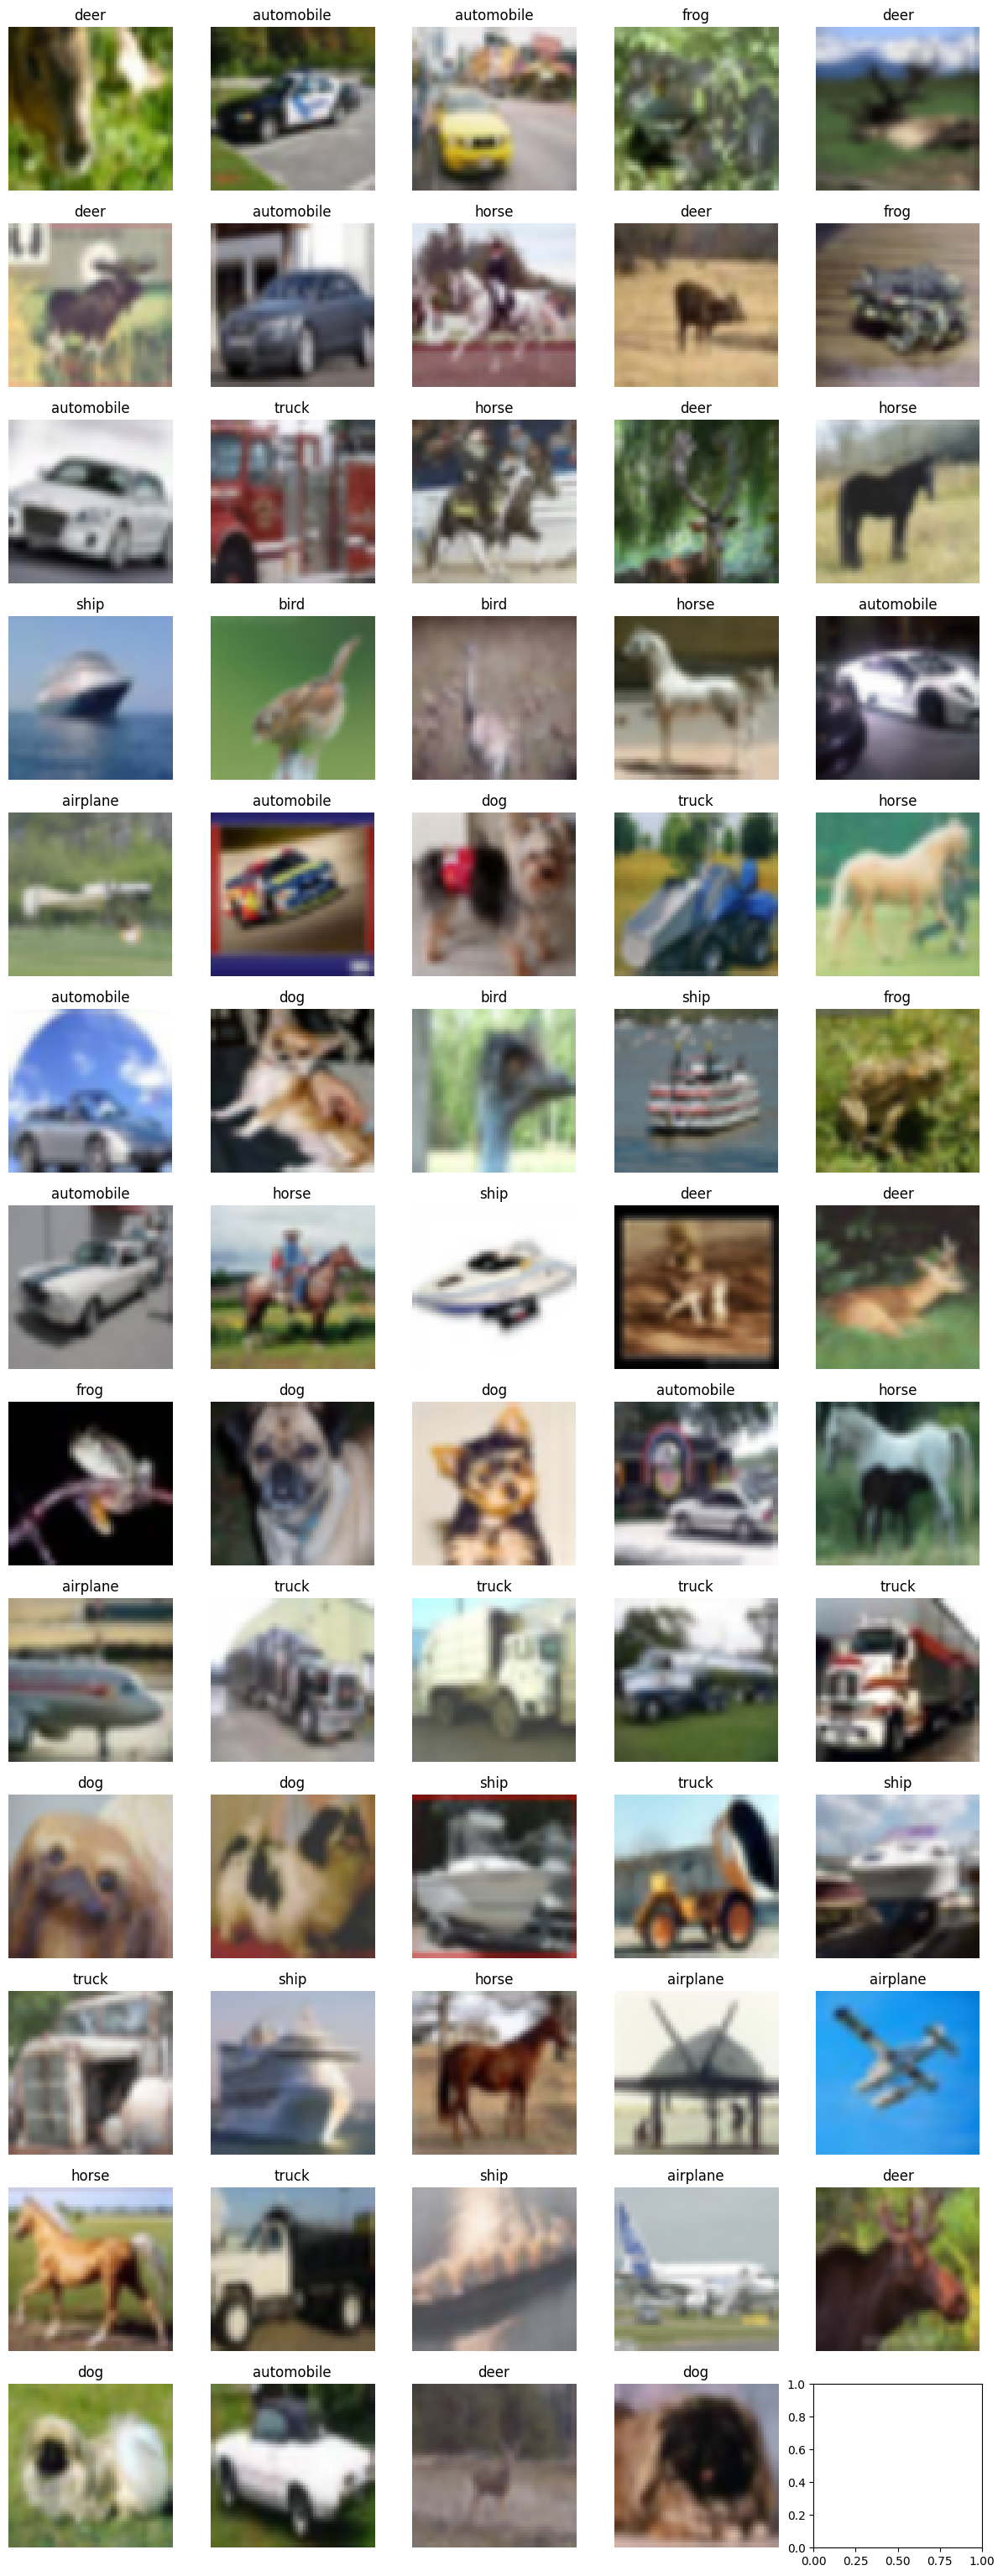

In [1]:
from generator import ImageGenerator
import matplotlib.pyplot as plt
# put the each batch into subplot 

gen = ImageGenerator(
    "data/exercise_data",
    "data/Labels.json",
    batch_size=64,
    image_size=(64, 64, 3),
    shuffle=True,
    mirroring=True
)

gen.show()

In [ ]:
from generator import ImageGenerator
gen = ImageGenerator("./exercise_data/", './Labels.json', 50, [32, 32, 3], rotation=False, mirroring=False,
                             shuffle=False)

gen2 = ImageGenerator("./exercise_data/", './Labels.json', 50, [32, 32, 3], rotation=False, mirroring=False,
  
                             shuffle=False)

gen.next()
print(gen.current_epoch())

gen.next()

print(gen.current_epoch())

gen.next()
print(gen.current_epoch())


Start: 0, End: 50, Epoch: 0
0
Start: 50, End: 100, Epoch: 0
0
Start: 0, End: 50, Epoch: 1
1


In [71]:
sample_index = np.random.choice(np.arange(50))
sample = b1[0][sample_index]
b1_without_sample = np.delete(b1[0], sample_index, axis=0)
print(np.any(np.all(sample == b1_without_sample), axis=(1,2,3)))
print(np.any(np.all(sample == b2[0], axis=(1,2,3))))

AxisError: axis 1 is out of bounds for array of dimension 0